# Estimating running times in practice

Problem: You want to estimate if a given algorithm, e.g. the Viterbi algorithm with algoritmic time complexity $O(NK^2)$, will result in a usable (i.e. fast enough) if implemented in a given programming language, e.g. Python. One approach is of course to implement the entire algorithm and make timing experiments, but implementing the entire algorithm is time consuming. Can you get a rough, but reliable, estimate faster?

Yes, by implemening a simpler algoritm that has the same core algorithmic time complexity, and see how it performs for the input sizes that you want to consider. 

## Examining the running time of a "dummy" implementation in Python

The function `dummy` below clearly has the same $O(NK^2)$ time complexity as the Viterbi algorithm.

In [2]:
def dummy(N, K):
    s = 0
    for n in range(N):
        for k in range(K):
            for i in range(K):
                s = s + 1
    return(s)

We want to investigate the running time of `dummy` by measuring and plotting it running time for various $N$ and $K$.

Below are functions for measuring running time and plotting

In [3]:
import matplotlib.pyplot as pyplot

def plot(xs, ys, xlabel="n", ylabel="run time (s)"):
    pyplot.plot(xs, ys)
    scale = 'linear'
    pyplot.xscale(scale)
    pyplot.yscale(scale)
    pyplot.title('')
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()

In [4]:
import os

def etime():
    """See how much user and system time this process has used
    so far and return the sum."""

    user, sys, chuser, chsys, real = os.times()
    return user+sys

We want to see if we can use our Python implementation of Viterbi for predicting the gene structure using our 7-state model. In this setting $N ≈ 2000000$ and $K=7$. We start to convince ourselves that it grows linearly in $N$.

In [5]:
def time_dummy(N, K):
    start = etime()
    dummy(N, K)
    end = etime()
    elapsed = end - start
    return elapsed

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

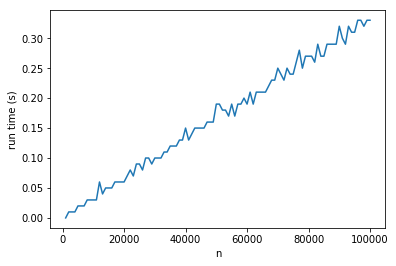

In [6]:
# We will mesaure the running for K=7 and N=1000, 2000, ..., 100000
Ns = [i * 1000 for i in range(1,101)]
Ts = []
for n in Ns:
    Ts.append(time_dummy(n, 7))
    print(".", end=" ")
plot(Ns,Ts)

Above we only measure the running time once for each choice of $N$. This can result in a jagged curve. It is often a good idea to plot the average of several measurements for each choice of $N$ as below.

. . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . . . . # . . 

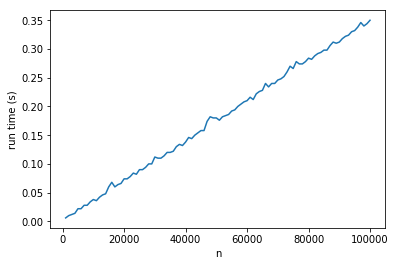

In [7]:
def mean(l):
    """Returns the mean of the values in the list l."""
    s = 0
    for e in l:
        s = s + e
    return s/len(l)

# We will mesaure the running for K=7 and N=1000, 2000, ..., 100000
Ns = [i * 1000 for i in range(1,101)]
Ts = []
for n in Ns:
    # We will measure the running time 5 times and calcualte the mean
    l = []
    for i in range(5):
        l.append(time_dummy(n, 7))
        print(".", end=" ")
    Ts.append(mean(l))
    print("#", end=" ")
plot(Ns,Ts)

It is more smoothe, but it of course takes longer to construct. 

Now that we have established that the running time scales linearly in $N$ as expected, we can make an estimate how long it would take for $N=2000000$ and $K=7$.

In [8]:
t1 = time_dummy(100000, 7)
print("Measured running time for N=100000: ", t1)
print("Estimate running time for N=2000000:", t1 * 20)
t20 = time_dummy(2000000, 7)
print("Measured running time for N=2000000:", t20)

Measured running time for N=100000:  0.3500000000000085
Estimate running time for N=2000000: 7.0000000000001705
Measured running time for N=2000000: 7.069999999999993


What if $K = 31$ as it is in the more realistic model for gene structure. How much slower do you think the running time becomes? Recall that the time complexity if $O(NK^2)$, i.e we would expect it to become $31^2 / 7^2 ≈ 20$ times slower.

In [16]:
31**2 / 7**2

19.612244897959183

Let us try to see if this is the case in practice.

In [9]:
t7 = time_dummy(100000, 7)
print("Measured running time for N=100000, K=7: ", t7)
print("Estimate running time for N=100000, K=31:", t7 * (31**2 / 7**2))
t31 = time_dummy(100000, 31)
print("Measured running time for N=100000, K=31:", t31)

Measured running time for N=100000, K=7:  0.3400000000000034
Estimate running time for N=100000, K=31: 6.668163265306189
Measured running time for N=100000, K=31: 4.349999999999994


In [31]:
print("Measured running time for N=2000000, K=31:", time_dummy(2000000, 31))

Measured running time for N=2000000, K=31: 85.99000000000001


Why is it faster in practice than expected? We would think it should scale linearly in $K^2$. Let us make a plot.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

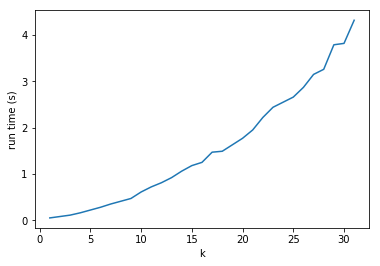

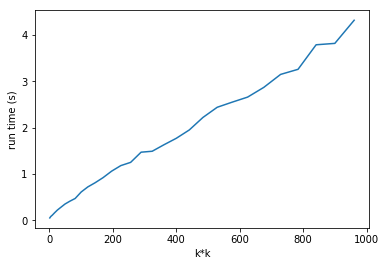

In [10]:
# We will mesaure the running for K=1,...,31 and N=100000
Ks = [i for i in range(1, 32)]
Ts = []
for k in Ks:
    Ts.append(time_dummy(100000, k))
    print(".", end=" ")
# Plot (K, time). Time should be quadratic in K
plot(Ks, Ts, "k")
# Plot (K^2, time). Time should be linear in K^2.
KKs = [k**2 for k in Ks]
plot(KKs, Ts, "k*k")

The running time does seem to scale linearly in $K^2$, but there is some overhead for small $K$ that apparently make us over estimate how fast it grows when we consider $K=7$.

## Examining the running time of a "dummy" implementation in C

A simple implementation of `dummy` in C:

You cannot run the above code inside this notebook. It must be compiled to an executable file in your terminal. If you have a C compiler installed (e.g. gcc om MacOs), you can compile it as `gcc -o dummy dummy.c`. For the following experiments to work, you must have the compiled file `dummy` in the same directory as this notebook.

A few functions for measuring the running time of a C implementation of `dummy` function.

In [12]:
from subprocess import *

def get_runningtime(cmd):
    pipe = Popen("/usr/bin/time -p %s" % (cmd), shell=True, stdout=PIPE, stderr=PIPE).stderr
    (real, user, sys) = [float(x.split()[1]) for x in pipe.readlines()]
    return user+sys

In [13]:
def time_dummy_c(N, K):
    cmd = "./dummy %d %d" % (N,K)
    return get_runningtime(cmd)

Let us do the same plots as above.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

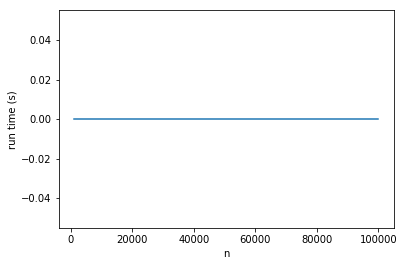

In [14]:
# We will mesaure the running for K=7 and N=1000, 2000, ..., 100000
Ns = [i * 1000 for i in range(1,101)]
Ts = []
for n in Ns:
    Ts.append(time_dummy_c(n, 7))
    print(".", end=" ")
plot(Ns,Ts)

Very fast. We cannot measure it with our resolution. Let us try $K=31$.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

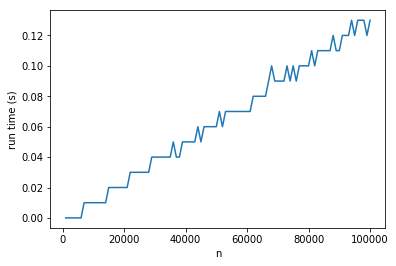

In [15]:
# We will mesaure the running for K=31 and N=1000, 2000, ..., 100000
Ns = [i * 1000 for i in range(1,101)]
Ts = []
for n in Ns:
    Ts.append(time_dummy_c(n, 31))
    print(".", end=" ")
plot(Ns,Ts)

## Running time in Python vs. C

How fast is our C implementation compared to our Python implementation?

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

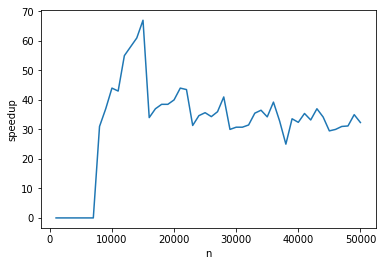

In [16]:
# We will mesaure the running for K=31 and N=1000, 2000, ..., 50000
Ns = [i * 1000 for i in range(1,51)]
Ts = []
for n in Ns:
    t_c = time_dummy_c(n, 31)
    t_p = time_dummy(n, 31)
    if t_c > 0:
        speedup = t_p / t_c
        Ts.append(speedup)
    else:
        Ts.append(0)
    print(".", end=" ")
plot(Ns,Ts, "n", "speedup")

It seems that the C implementation is about **?** times faster than Python, including some additional overhead.

Finally. Let us consinder $N = 2000000$ and $K=7$ and $K=31$ as was our initial questions.

In [89]:
tp = time_dummy(2000000, 7)
tc = time_dummy_c(2000000, 7)
print("Measured running time in Python for N=2000000, K=7:", tp)
print("Measured running time in C for N=2000000, K=7:     ", tc)
print("Speedup:", tp / tc)

Measured running time in Python for N=2000000, K=31: 7.160000000000082
Measured running time in C for N=2000000, K=31:      0.14
Speedup:  51.14285714285772


In [90]:
tp = time_dummy(2000000, 31)
tc = time_dummy_c(2000000, 31)
print("Measured running time in Python for N=2000000, K=31:", tp)
print("Measured running time in C for N=2000000, K=31:     ", tc)
print("Speedup: ", tp / tc)

Measured running time in Python for N=2000000, K=31: 86.7399999999999
Measured running time in C for N=2000000, K=31:      2.69
Speedup:  32.24535315985126
